# Práctica 1 - Visión por Computador

### Autores

- Pablo Segura López
- Kilian Armas Pérez

### Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

(512, 512, 3)


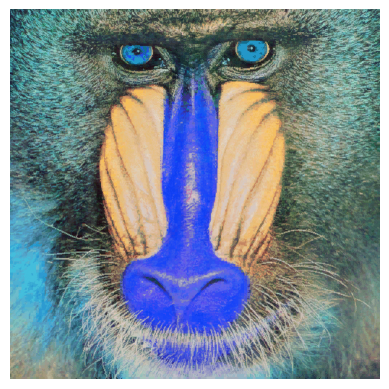

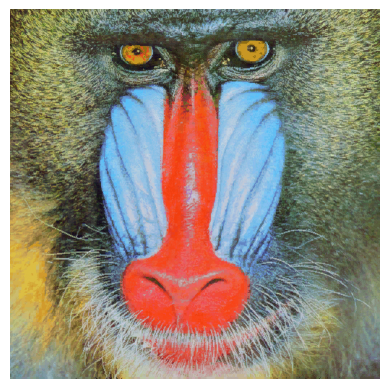

In [3]:
#Lee imagen de archivo
img = cv2.imread('Material P2/mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    #Muestra dimensiones
    print(img.shape)
    #Mostramos la imagen original con matplotlib
    plt.figure()
    #Eliminamos etiquetas de los ejes
    plt.axis("off")
    plt.imshow(img) 
    plt.show()

    #Recordar que OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Muestra la imagen tras convertir a RGB
    #Eliminamos etiquetas de los ejes
    plt.figure()
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()
else: 
    print('Imagen no encontrada')

Convierte a grises para procesar

(512, 512)


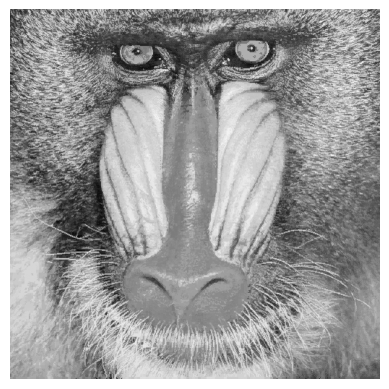

In [4]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de contornos multietapa. Tratado en las sesiones de teoría (tema 4)

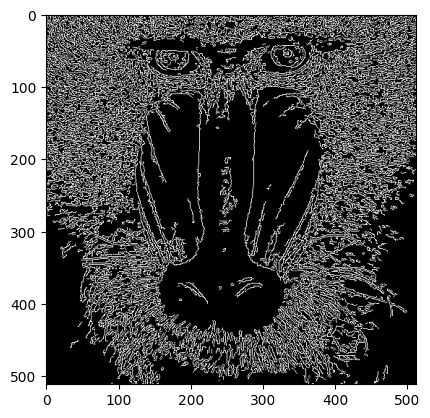

In [5]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Contar el número de píxeles no nulos por columna y visualizar

(0.0, 512.0)

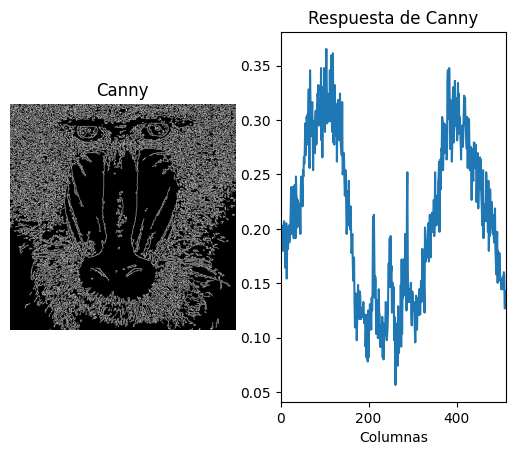

In [6]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

## Tarea 1 - Realizar la cuenta de píxeles blancos por filas (en lugar de por columnas).

Además, determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.

(0.0, 512.0)

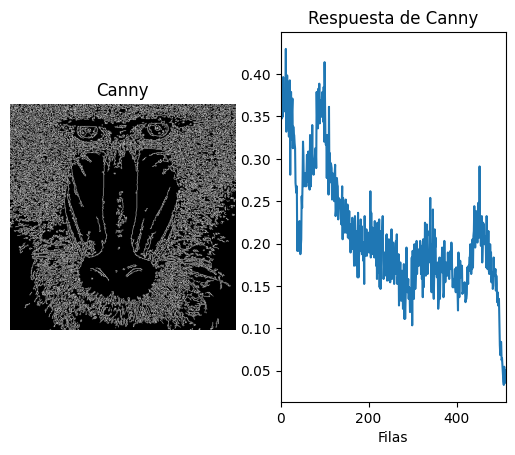

In [7]:
# El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
# print(canny)
# Cuenta el número de píxeles blancos (255) por fila
# Suma los valores de los píxeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de columnas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * canny.shape[0])

# Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
# Rango en x definido por las filas
plt.xlim([0, canny.shape[0]])

In [8]:
col_counts_canny = col_counts[0]/255
row_counts_canny = row_counts[:, 0]/255

max_col = np.max(col_counts_canny)
max_row = np.max(row_counts_canny)
min_col = np.min(col_counts_canny)
min_row = np.min(row_counts_canny)

print("Máximo de píxeles blancos en una columna: ", max_col)
print("Máximo de píxeles blancos en una fila: ", max_row)
print("Mínimo de píxeles blancos en una columna: ", min_col)
print("Mínimo de píxeles blancos en una fila: ", min_row, "\n")

max_col_index = np.argmax(col_counts_canny)
max_row_index = np.argmax(row_counts_canny)
min_col_index = np.argmin(col_counts_canny)
min_row_index = np.argmin(row_counts_canny)

print("Índice de la columna con el máximo de píxeles blancos: ", max_col_index)
print("Índice de la fila con el máximo de píxeles blancos: ", max_row_index)
print("Índice de la columna con el mínimo de píxeles blancos: ", min_col_index)
print("Índice de la fila con el mínimo de píxeles blancos: ", min_row_index, "\n")

max_col_95 = col_counts_canny >= (0.95 * max_col)
max_row_95 = row_counts_canny >= (0.95 * max_row)

print("Columnas con un número mayor o igual que 0.95 * máximo: ", np.sum(max_col_95))
print("Filas con un número mayor o igual que 0.95 * máximo: ", np.sum(max_row_95))

Máximo de píxeles blancos en una columna:  187.0
Máximo de píxeles blancos en una fila:  220.0
Mínimo de píxeles blancos en una columna:  29.0
Mínimo de píxeles blancos en una fila:  17.0 

Índice de la columna con el máximo de píxeles blancos:  104
Índice de la fila con el máximo de píxeles blancos:  12
Índice de la columna con el mínimo de píxeles blancos:  261
Índice de la fila con el mínimo de píxeles blancos:  507 

Columnas con un número mayor o igual que 0.95 * máximo:  6
Filas con un número mayor o igual que 0.95 * máximo:  2


Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel aproxima el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1].

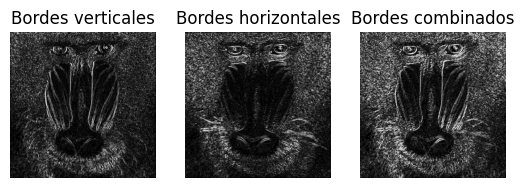

In [9]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Bordes verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Bordes horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Bordes combinados')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Prueba sin convertir escala
plt.show()

## Tarea 2 - Aplicar umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel))

Y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

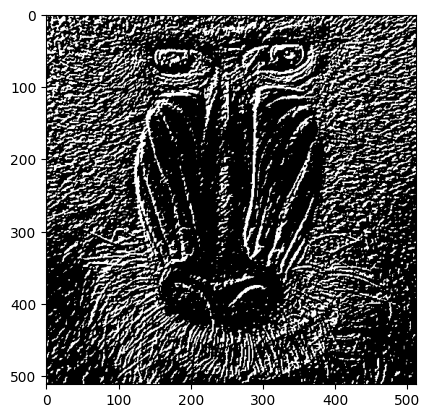

In [10]:
# Umbralizado de la imagen resultante de Sobel
valorUmbral = 40
res, sobel8 = cv2.threshold(sobel, valorUmbral, 255, cv2.THRESH_BINARY)
sobel8 = np.uint8(sobel8)
plt.imshow(sobel8, cmap='gray') #Visualiza con mapa de color gris
plt.show()

In [11]:
# Cálculo de los máximos por filas y columnas
col_counts_sobel = cv2.reduce(sobel8, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[0]/255
row_counts_sobel = cv2.reduce(sobel8, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)[:,0]/255

max_col_sobel = np.max(col_counts_sobel)
max_row_sobel = np.max(row_counts_sobel)
min_col_sobel = np.min(col_counts_sobel)
min_row_sobel = np.min(row_counts_sobel)

print("Máximo de píxeles blancos en una columna: ", max_col_sobel)
print("Máximo de píxeles blancos en una fila: ", max_row_sobel)
print("Mínimo de píxeles blancos en una columna: ", min_col_sobel)
print("Mínimo de píxeles blancos en una fila: ", min_row_sobel, "\n")

max_col_index_sobel = np.argmax(col_counts_sobel)
max_row_index_sobel = np.argmax(row_counts_sobel)
min_col_index_sobel = np.argmin(col_counts_sobel)
min_row_index_sobel = np.argmin(row_counts_sobel)

print("Índice de la columna con el máximo de píxeles blancos: ", max_col_index_sobel)
print("Índice de la fila con el máximo de píxeles blancos: ", max_row_index_sobel)
print("Índice de la columna con el mínimo de píxeles blancos: ", min_col_index_sobel)
print("Índice de la fila con el mínimo de píxeles blancos: ", min_row_index_sobel, "\n")

max_col_95_sobel = col_counts_sobel >= (0.95 * max_col_sobel)
max_row_95_sobel = row_counts_sobel >= (0.95 * max_row_sobel)

print("Columnas con un número mayor o igual que 0.95 * máximo: ", np.sum(max_col_95_sobel))
print("Filas con un número mayor o igual que 0.95 * máximo: ", np.sum(max_row_95_sobel))


Máximo de píxeles blancos en una columna:  234.0
Máximo de píxeles blancos en una fila:  223.0
Mínimo de píxeles blancos en una columna:  43.0
Mínimo de píxeles blancos en una fila:  35.0 

Índice de la columna con el máximo de píxeles blancos:  127
Índice de la fila con el máximo de píxeles blancos:  101
Índice de la columna con el mínimo de píxeles blancos:  261
Índice de la fila con el mínimo de píxeles blancos:  510 

Columnas con un número mayor o igual que 0.95 * máximo:  2
Filas con un número mayor o igual que 0.95 * máximo:  7


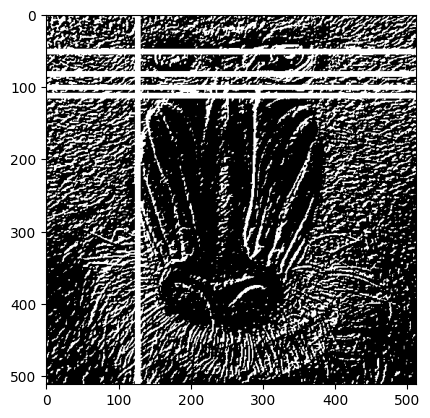

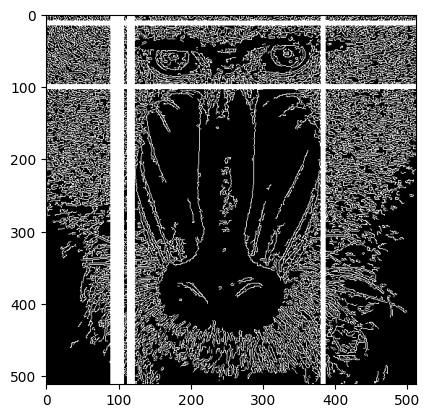

In [12]:
# Primitiva gráfica sobre las columnas y filas con un número de píxeles blancos mayor o igual que el 95% del máximo
columns = sobel8.shape[0]
rows = sobel8.shape[1]
for i in range(0, columns):
    if max_col_95_sobel[i]:
        cv2.line(sobel8, (i, 0), (i, rows), (255, 0, 0), 5)
for i in range(0, rows):
    if max_row_95_sobel[i]:
        cv2.line(sobel8, (0, i), (columns, i), (255, 0, 0), 5)
plt.imshow(sobel8, cmap='gray')
plt.show()

columns = canny.shape[0]
rows = canny.shape[1]
for i in range(0, columns):
    if max_col_95[i]:
        cv2.line(canny, (i, 0), (i, rows), (255, 0, 0), 5)
for i in range(0, rows):
    if max_row_95[i]:
        cv2.line(canny, (0, i), (columns, i), (255, 0, 0), 5)
plt.imshow(canny, cmap='gray')
plt.show()

Diferencia de imágenes

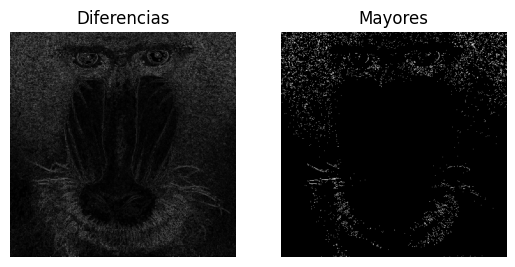

In [13]:
#Calcula la diferencia entre dos imágenes
#Utiliza la imagen original y la obtenida tras aplicar la gaussiana (creada en la celda dedicada a Sobel)
dif = cv2.absdiff(gris, ggris)

#Visualiza
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Mayores")
plt.axis("off")
plt.imshow(imgdif, cmap='gray') 
plt.show()


Webcam y sustracción de fotogramas

In [14]:
vid = cv2.VideoCapture(0)

#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)        
            # Muestra resultado
            cv2.imshow('Diferencia', dif)        

        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Webcam y sustracción de modelo del fondo

In [15]:
vid = cv2.VideoCapture(0)

# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        objetos = eliminadorFondo.apply(framem)
        #objetos = eliminadorFondo.apply(framem, objetos, 0)  #No actualiza el fondo
        # Obtiene fondo
        background = eliminadorFondo.getBackgroundImage()

        # Muestra resultado
        cv2.imshow('Fotograma', objetos)
        # Muestra fondo
        cv2.imshow('Fondo', background)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

## Tarea 3 - Proponer un demostrador que capture las imágenes de la cámara.

Y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [44]:
vid = cv2.VideoCapture(0)

# El modo por defecto es el 0, con la cámara normal
mode = 0
while(True):
    ret, frame = vid.read()

    if ret:
        # El modo 1 muestra el efecto invertido
        if mode == 1:
            frame = 255 - frame
        if mode == 2:
            # Dimensiones imagen de entrada
            h, w, c = frame.shape
            # Calcular luminiscencia usando operaciones vectorizadas
            luminiscence = 0.299 * frame[:,:,2] + 0.587 * frame[:,:,1] + 0.114 * frame[:,:,0]
            # Calcular la luminiscencia promedio en bloques de 8x8
            block_size = 16
            luminiscence_blocks = luminiscence.reshape(h // block_size, block_size, -1, block_size).mean(axis=(1, 3))
            # Encontrar los índices del bloque más oscuro y más brillante
            min_block_idx = np.unravel_index(np.argmin(luminiscence_blocks), luminiscence_blocks.shape)
            max_block_idx = np.unravel_index(np.argmax(luminiscence_blocks), luminiscence_blocks.shape)
            # Convertir los índices de bloque a coordenadas de píxeles
            min_pixel_idx = (min_block_idx[1] * block_size + block_size//2, min_block_idx[0] * block_size + block_size//2)
            max_pixel_idx = (max_block_idx[1] * block_size + block_size//2, max_block_idx[0] * block_size + block_size//2)
            # Dibujar rectángulos en los bloques más oscuro y más brillante
            cv2.circle(frame, min_pixel_idx, 16, (255, 255, 255), -1)
            cv2.circle(frame, max_pixel_idx, 16, (0, 0, 0), -1)
        if mode == 3:
            # Crear "glitches" desplazando los canales de color
            b, g, r = cv2.split(frame)
            b = np.roll(b, 4, axis=1)  # Desplaza el canal azul
            g = np.roll(g, -4, axis=0)  # Desplaza el canal verde
            r = np.roll(r, 4, axis=1)  # Desplaza el canal rojo
            frame = cv2.merge((b, g, r))
        if mode == 4:
            mask = np.zeros(frame.shape[:2], dtype="uint8")
            face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
            face = face_classifier.detectMultiScale(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))
            for (x, y, w, h) in face:
                cv2.circle(mask, ((2*x + w)//2, (2*y + h)//2), h, 255, -1)
            frame = cv2.bitwise_and(frame, frame, mask=mask)

        # Muestra el nuevo frame
        cv2.imshow('Webcam', frame)

    # Choose mode
    pressed_key = cv2.waitKey(20)
    if pressed_key >= 48 and pressed_key <= 52:
        mode = pressed_key - 48
    # Detenemos pulsando ESC
    if pressed_key == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

## Tarea 4 - Plantear una reinterpretación de la parte de procesamiento de la imagen tomando como punto de partida alguna de dichas instalaciones.

Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared).

In [39]:
vid = cv2.VideoCapture(0)

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        mask = np.zeros(frame.shape[:2], dtype="uint8")
        face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        face = face_classifier.detectMultiScale(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))
        for (x, y, w, h) in face:
            cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)
        #cv2.circle(mask, (145, 200), 100, 255, -1)
        frame = cv2.bitwise_and(frame, frame, mask=mask)
        cv2.imshow('Webcam', frame)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()
    